##Rock Classification Models: Softmax Regression, Support Vector Machines, Random Forests, and Ensemble Learning

Presented by Clayton Greenwell, Chidera Ezeani, Wodsander Maxime, Nigel Mills, and Mihir Sastry for CSCI P556 Applied Machine Learning

**Instructions**

The goal of this assignment is to explore different classification algorithms.

> In this assignment, you will apply different classification methods. You will use a Rock dataset where you will use 11 different rock features to predict the rock category.
>The data you need are included in these two files:
>>1) "aggregateRockData.xlsx" -- you will only use 2nd column that contains the rock category number (1 = Igneous, 2 = Metamorphic, 3 = Sedimentary) - that will be the label.
>>2) "features_presence540.txt" -- you will only use columns 4 to 14 as the attributes (features) and column 3 (token number) to separate train, validation and test data (see below).

> See this website for a detailed description of the dataset: https://osf.io/cvwu9/wiki?wiki=7ky6h.

> We will use only the first 480 rows (so ignore rows 481 to 720).

Resources we used for reference in creating this notebook:


*   Code from class powerpoint slides
*   Code from the textbook: "Hands On Machine Learning"





Before we do anything, let's import our packages and our data. We can also do some immediate data cleaning.

By default, the datasets don't include column names, so we'll need to add them manually. The column names can be found on the website the datasets come from, and have been placed into lists here.

We only care about rocks number 1-480 for this assignment; therefore, we want to cut all other rocks out of the dataset. Because the entries are already ordered by number, the easiest way to do this is to simply append ".head(480)" to both read functions.

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set column names:

aggregate_columns = [
    "Rock number", # 1 - 720, but we only care about 1 - 480
    "Category number", # 1 = igneous, 2 = metamorphic, 3 = sedimentary
    "Subtype number",
    "Token number",
    "Stimulus Type",
    'Frequency responded "Igneous"',
    'Frequency responded "Metamorphic"',
    'Frequency responded "Sedimentary"',
    'Frequency responded "Old"',
    'Frequency responded "New"',
    'Proportion responded "Igneous"',
    'Proportion responded "Metamorphic"',
    'Proportion responded "Sedimentary"',
    'Proportion responded "Old"',
]

presence_columns = [
    "Rock number",
    "Subtype number",
    "Token number",
    "Angular fragments",
    "Rounded fragments",
    "Straight stripes",
    "Curved stripes",
    "Physical layers",
    "Veins",
    "Oily/shimmery texture",
    "Splotchy texture",
    "Single translucent crystal",
    "Multiple cubic crystals",
    "Sandy texture",
    "Fragments (disjunctive)",
    "Stripes (disjunctive)",
    "Crystals (disjunctive)",
]

# Now we can load our datasets while also adding the column names and
# limiting their scopes to the first 480 rocks:

aggregate = pd.read_excel("aggregateRockData.xlsx", header = None,
                     names = aggregate_columns).head(480)

# lets pandas split on any and all whitespace, which is crucial for
# irregularly spaced data files
presence = pd.read_csv("feature_presence540.txt", sep = r"\s+", header = None,
# "engine = python" necessary to enable reg. expression separators
                       names = presence_columns, engine = "python").head(480)

In [2]:
# Let's look at our first file:

aggregate

,Rock number,Category number,Subtype number,Token number,Stimulus Type,"Frequency responded ""Igneous""","Frequency responded ""Metamorphic""","Frequency responded ""Sedimentary""","Frequency responded ""Old""","Frequency responded ""New""","Proportion responded ""Igneous""","Proportion responded ""Metamorphic""","Proportion responded ""Sedimentary""","Proportion responded ""Old"""
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,3,30,12,1,2,30,50,47,35,0.024390,0.365854,0.609756,0.573171
476,477,3,30,13,3,6,33,43,41,41,0.073171,0.402439,0.524390,0.500000
477,478,3,30,14,3,11,36,35,29,53,0.134146,0.439024,0.426829,0.353659
478,479,3,30,15,3,4,48,30,49,33,0.048780,0.585366,0.365854,0.597561


In [3]:
# And our second file:

presence

,Rock number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
0,1,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,0.32,0.0,0.00
1,2,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,0.70,0.0,0.05
2,3,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,0.60,0.0,0.00
3,4,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,0.86,0.0,0.00
4,5,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,0.87,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,30,12,0.00,0.00,0.00,0.0,0.60,0.05,0.0,0.00,0.0,0.00,0.30,0.00,0.0,0.00
476,477,30,13,0.00,0.00,0.00,0.0,0.40,0.00,0.0,0.05,0.0,0.00,0.35,0.00,0.0,0.00
477,478,30,14,0.00,0.00,0.00,0.0,0.45,0.05,0.0,0.05,0.0,0.00,0.20,0.00,0.0,0.00
478,479,30,15,0.00,0.00,0.00,0.0,0.40,0.10,0.0,0.10,0.0,0.00,0.20,0.00,0.0,0.00


**Data Cleaning/Data Transformation**

Next, we need to concatenate our two datasets into one primary dataset, dropping any columns we aren't going to use for our main analysis. Because both datasets have the rocks in the exact same order, this is as simple as performing a left join. This happens in a few steps:

*   Both datasets share the columns "Rock number", "Subtype number", and "Token number", so they're dropped from the presence dataset to simplify the joining process and eliminate the need for additional arguments.
*   Rock number is made the actual index number via the set_index() function.
*   Lastly, we append a list of all the columns we wish to keep in the joined dataset.

In [4]:
rocks_df = aggregate.join(
    presence.drop(columns = ["Rock number", "Subtype number", "Token number"])
    ).set_index("Rock number")[["Category number", "Token number",
        "Angular fragments", "Rounded fragments", "Straight stripes",
        "Curved stripes", "Physical layers", "Veins", "Oily/shimmery texture",
        "Splotchy texture", "Single translucent crystal",
        "Multiple cubic crystals", "Sandy texture"]]

rocks_df

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
Rock number,,,,,,,,,,,,,
1,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
2,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
3,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
4,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
5,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,3,12,0.00,0.00,0.00,0.0,0.60,0.05,0.0,0.00,0.0,0.00,0.30
477,3,13,0.00,0.00,0.00,0.0,0.40,0.00,0.0,0.05,0.0,0.00,0.35
478,3,14,0.00,0.00,0.00,0.0,0.45,0.05,0.0,0.05,0.0,0.00,0.20


In [5]:
# Check for null values:
rocks_df.isna().sum()

,0
Category number,0
Token number,0
Angular fragments,0
Rounded fragments,0
Straight stripes,0
Curved stripes,0
Physical layers,0
Veins,0
Oily/shimmery texture,0
Splotchy texture,0


In [6]:
# We can also export this if we ever want to look at our dataset in its entirety

rocks_df.to_csv("rocks_df.csv", index=False)

# **1. Statistical Values and Histograms**
Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [7]:
rocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 480
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             480 non-null    int64  
 1   Token number                480 non-null    int64  
 2   Angular fragments           480 non-null    object 
 3   Rounded fragments           480 non-null    object 
 4   Straight stripes            480 non-null    object 
 5   Curved stripes              480 non-null    float64
 6   Physical layers             480 non-null    float64
 7   Veins                       480 non-null    float64
 8   Oily/shimmery texture       480 non-null    float64
 9   Splotchy texture            480 non-null    float64
 10  Single translucent crystal  480 non-null    float64
 11  Multiple cubic crystals     480 non-null    float64
 12  Sandy texture               480 non-null    float64
dtypes: float64(8), int64(2), object(3)
memor

Category number and Token Number are stored as integers. 3 features are stored as objects. The remaining 8 features are stored as floats. This is not ideal. We will need to change these 3 feature objects to register as floats. The change from object to numeric is essential for any quantitative analysis, visualization, or modeling task, and helps avoid subtle errors or incomplete results.

In [8]:
# Changing 3 features to floats
rocks_df["Angular fragments"] = pd.to_numeric(rocks_df["Angular fragments"],
                                     errors="raise").astype("float64")
rocks_df["Rounded fragments"] = pd.to_numeric(rocks_df["Rounded fragments"],
                                     errors="raise").astype("float64")
rocks_df["Straight stripes"] = pd.to_numeric(rocks_df["Straight stripes"],
                                     errors="raise").astype("float64")

# Let's see if it worked.
rocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 480
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             480 non-null    int64  
 1   Token number                480 non-null    int64  
 2   Angular fragments           480 non-null    float64
 3   Rounded fragments           480 non-null    float64
 4   Straight stripes            480 non-null    float64
 5   Curved stripes              480 non-null    float64
 6   Physical layers             480 non-null    float64
 7   Veins                       480 non-null    float64
 8   Oily/shimmery texture       480 non-null    float64
 9   Splotchy texture            480 non-null    float64
 10  Single translucent crystal  480 non-null    float64
 11  Multiple cubic crystals     480 non-null    float64
 12  Sandy texture               480 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 5

In [9]:
rocks_df.describe()

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,8.500000,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,4.614582,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,8.500000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,12.250000,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


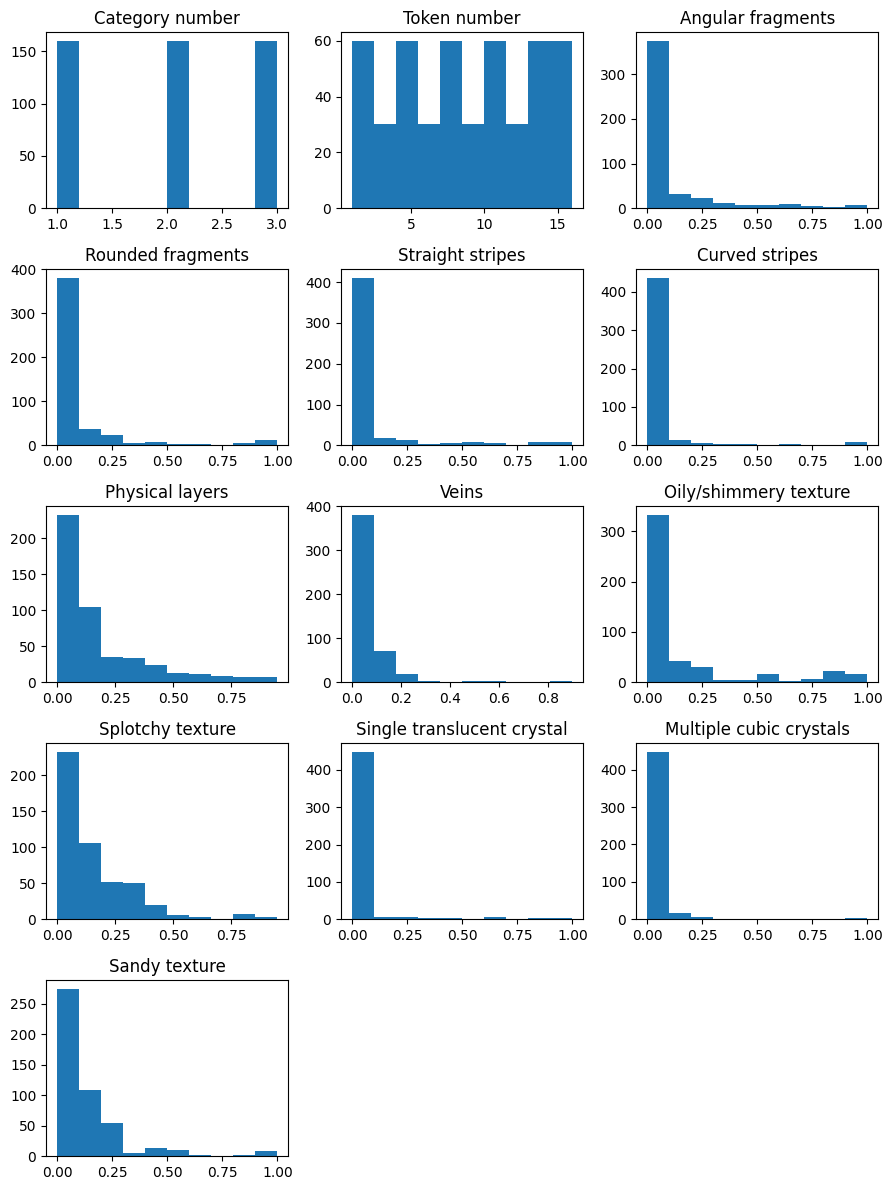

In [10]:
# Histograms

plt.figure(figsize = (9, 12))
for i, N in enumerate(rocks_df.columns):
    plt.subplot(5, 3, i+1)
    plt.hist(rocks_df[N])
    plt.title(N)
plt.tight_layout()

# **2. Pearson Correlation Coefficients**
Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC).

In [11]:
continuous_features_1 = [
    'Angular fragments',
    'Rounded fragments',
    'Straight stripes',
    'Curved stripes',
    'Physical layers',
    'Veins',
    'Oily/shimmery texture',
    'Splotchy texture',
    'Single translucent crystal',
    'Multiple cubic crystals',
    'Sandy texture',
    'Category number'
]

In [12]:
label_column = 'Category number'

# Calculate Pearson Correlation Coefficients
correlations = rocks_df[continuous_features_1].corr()[label_column]

# Sort by absolute values but keep original signs (reverse order)
correlations_sorted = correlations.iloc[correlations.abs().argsort()[::-1]]

# Print the correlations
print(
    "Pearson Correlation Coefficients with "
    "'Category number' (Sorted by Absolute Value):\n"
)
print(correlations_sorted)

Pearson Correlation Coefficients with 'Category number' (Sorted by Absolute Value):

Category number               1.000000
Physical layers               0.266699
Single translucent crystal    0.258910
Splotchy texture             -0.229273
Veins                         0.140553
Sandy texture                 0.139845
Angular fragments            -0.122447
Multiple cubic crystals       0.113872
Straight stripes              0.077495
Curved stripes               -0.017454
Rounded fragments             0.017446
Oily/shimmery texture         0.008172
Name: Category number, dtype: float64


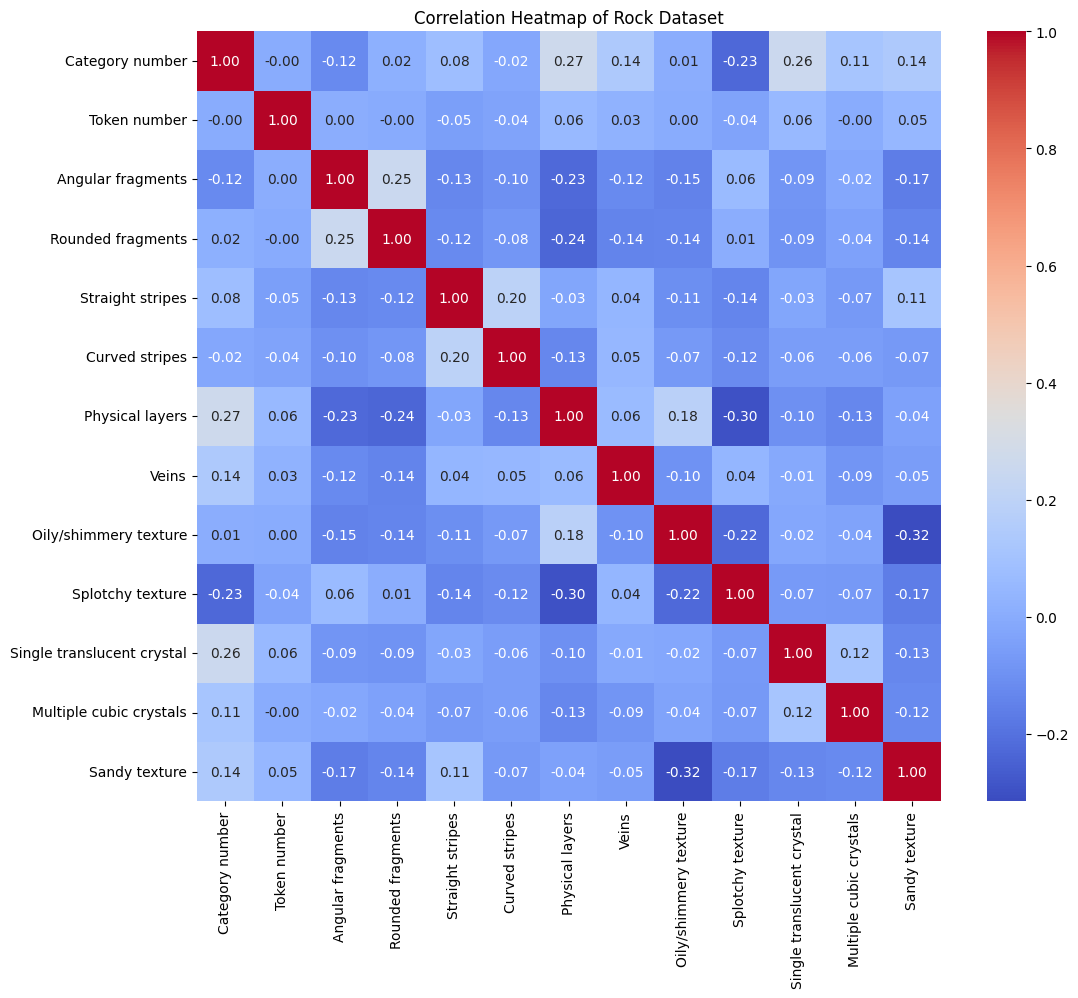

In [13]:
corr_matrix = rocks_df.corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Rock Dataset')
plt.show()

In [14]:
correlations_sorted.abs().nlargest(4).index.tolist()

['Category number',
 'Physical layers',
 'Single translucent crystal',
 'Splotchy texture']

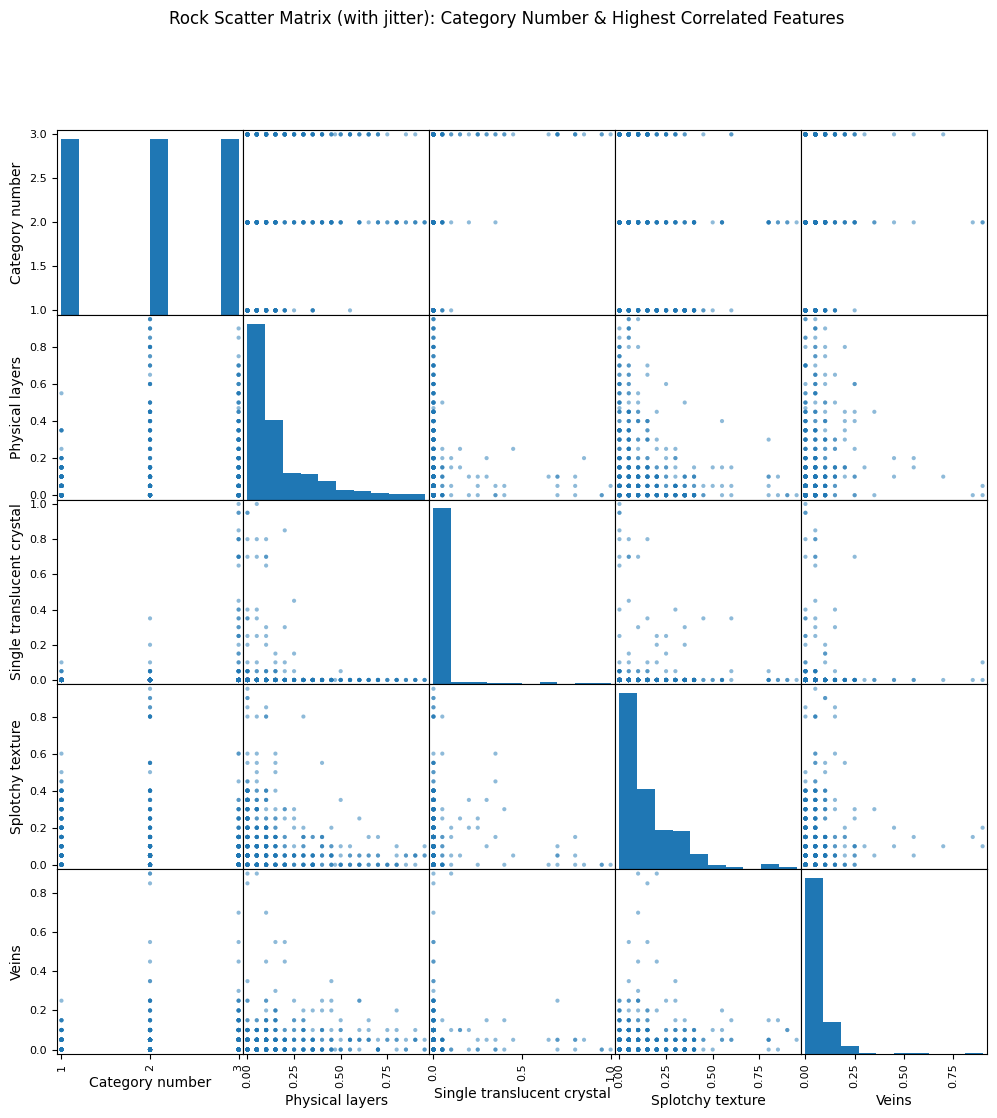

In [15]:
# We're going to make a scatter matrix with an added bit of jitter.

from pandas.plotting import scatter_matrix

attributes = ["Category number", "Physical layers",
              "Single translucent crystal",
              "Splotchy texture", "Veins"]

rocks_jittered = rocks_df[attributes].copy()

for col in attributes:
    # Add small Gaussian noise for jitter
    rocks_jittered[col] = rocks_df[col] + np.random.normal(0, 0.05, size=len(rocks_df))

scatter_matrix(rocks_df[attributes], figsize=(12, 12))
plt.suptitle(
    "Rock Scatter Matrix (with jitter): Category Number & Highest Correlated Features"
)
plt.show()

Our features are not highly correlated, and this produces unexpected results.

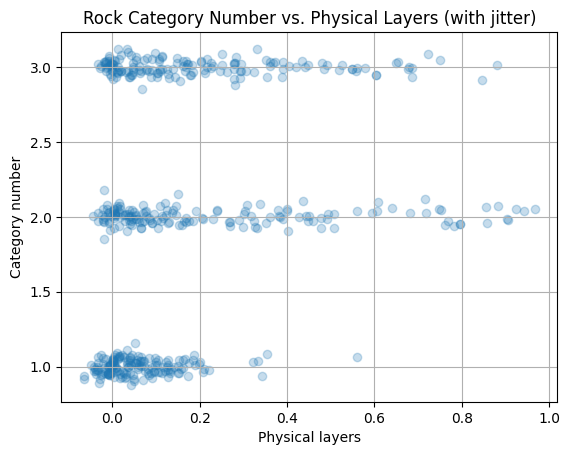

In [16]:
# Single scatterplot showing what is likely our best predictor:
# Physical layers
x_jitter = (
    rocks_df["Physical layers"]
    + np.random.normal(0, 0.02, size=len(rocks_df))  # jitter
)
y_jitter = (
    rocks_df["Category number"]
    + np.random.normal(0, 0.05, size=len(rocks_df))  # jitter
)

plt.scatter(x_jitter, y_jitter, alpha=0.25)
plt.grid(True)
plt.title("Rock Category Number vs. Physical Layers (with jitter)")
plt.xlabel("Physical layers")
plt.ylabel("Category number")
plt.show()


Using jitter on our most highly correlated feature (physical layer) produces an interesting result. At 0.27, this is not highly correlated.

# **3. Feature Scaling**

For training data, use token numbers 7-16, for validation 4 to 6, and for testing 1 to 3 (each of the 30 rock subtypes has 16 token numbers).

In [17]:
rocks_df["Token number"] = pd.to_numeric(
    rocks_df["Token number"],
    errors="coerce"
)

# Split the data into training, validation, and test sets
train_data = rocks_df[rocks_df["Token number"] >= 7]

val_data = rocks_df[
    (rocks_df["Token number"] >= 4)
    & (rocks_df["Token number"] <= 6)
]
test_data = rocks_df[rocks_df["Token number"] <= 3]

# Display the shapes of the sets
print("Training set shape:", train_data.shape)
print("Validation set shape:", val_data.shape)
print("Test set shape:", test_data.shape)


Training set shape: (300, 13)
Validation set shape: (90, 13)
Test set shape: (90, 13)


In [18]:
# --- Features (X) and target (y) ---
X = rocks_df.drop(columns=["Category number", "Token number"])
y = rocks_df["Category number"]

X_train = train_data.drop(columns=["Category number", "Token number"])
y_train = train_data["Category number"]

X_val = val_data.drop(columns=["Category number", "Token number"])
y_val = val_data["Category number"]

X_test = test_data.drop(columns=["Category number", "Token number"])
y_test = test_data["Category number"]

In [19]:
from sklearn.preprocessing import StandardScaler

# --- Scale features for models that need it (LogReg, SVM) ---
scaler = StandardScaler()

# Scale X as a whole...
X_scaled = pd.DataFrame(scaler.fit_transform(X))

# Add the token numbers back (we don't want to scale those)...
X_scaled["Token number"] = aggregate["Token number"]
# rocks_df["Token number"] doesn't work here because the index is different,
# so it inserts NaN as the first row's token and pushes all the rest down by 1

# Split the scaled dataset into train/val/test...
X_train_scaled = X_scaled[X_scaled["Token number"] >= 7]
X_val_scaled = X_scaled[(X_scaled["Token number"] >= 4) & (X_scaled["Token number"] <= 6)]
X_test_scaled = X_scaled[X_scaled["Token number"] <= 3]

# ...and drop the "Token number" column from them again
X_scaled = X_scaled.drop(columns=["Token number"])
X_train_scaled = X_train_scaled.drop(columns=["Token number"])
X_val_scaled = X_val_scaled.drop(columns=["Token number"])
X_test_scaled = X_test_scaled.drop(columns=["Token number"])

In [20]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.596102,0.353480,-0.348062,-0.263005,-0.763119,-0.023358,-0.544358,0.943441,-0.233692,-0.224072,-0.114785
1,2.918160,0.353480,-0.348062,-0.263005,-0.532075,-0.510837,-0.544358,-0.246708,-0.233692,0.222213,-0.403855
2,2.660153,-0.406238,-0.348062,-0.263005,-0.532075,-0.510837,-0.544358,1.240978,-0.233692,-0.224072,-0.403855
3,0.080089,3.898827,-0.348062,-0.263005,-0.532075,-0.510837,-0.544358,-0.246708,-0.233692,-0.224072,-0.114785
4,1.370121,3.645588,-0.348062,-0.263005,-0.763119,-0.510837,-0.544358,-0.246708,-0.233692,-0.224072,-0.403855
...,...,...,...,...,...,...,...,...,...,...,...
475,-0.435923,-0.406238,-0.348062,-0.263005,2.009408,-0.023358,-0.544358,-0.841782,-0.233692,-0.224072,1.041495
476,-0.435923,-0.406238,-0.348062,-0.263005,1.085232,-0.510837,-0.544358,-0.544245,-0.233692,-0.224072,1.330565
477,-0.435923,-0.406238,-0.348062,-0.263005,1.316276,-0.023358,-0.544358,-0.544245,-0.233692,-0.224072,0.463355
478,-0.435923,-0.406238,-0.348062,-0.263005,1.085232,0.464121,-0.544358,-0.246708,-0.233692,-0.224072,0.463355


The data is split into train, val, and test based on the token number. As specified by the question, rocks with tokens 1-3 are used for the test data; those with tokens 4-6 are used for the validation data; and the remaining rocks go in the training data. From there, we also separate these datasets into X and y, where y contains our target feature -- the category of rock we're guessing -- and X has all of our predictor variables.

# **4. A) Softmax Regression**

Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):


> A. Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    results = {}


    for name, (X, y) in {
        "Train": (X_train, y_train),
        "Validation": (X_val, y_val),
        "Test": (X_test, y_test)
    }.items():
        y_pred = model.predict(X)
        results[name] = {
            "Accuracy":  accuracy_score(y, y_pred),
            "Precision": precision_score(y, y_pred, average="weighted", zero_division=0),
            "Recall":    recall_score(y, y_pred, average="weighted", zero_division=0),
            "F1":        f1_score(y, y_pred, average="weighted", zero_division=0)
        }
        print(f"\n{name} Performance:\n", classification_report(y, y_pred, zero_division=0))
    return results

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# --- Grid Search for Softmax Regression ---
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga', 'newton-cg'],
    'max_iter': [200, 500, 1000]
}

grid_logreg = GridSearchCV(
    LogisticRegression(multi_class='multinomial'),
    param_grid_logreg,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)


grid_logreg.fit(X_train_scaled, y_train)
# Found the best Logistic Regression Parameters using grid search
print("Best Logistic Regression Params:", grid_logreg.best_params_)

#Get the model weights
best_logreg = grid_logreg.best_estimator_

# --- Evaluate ---
results_logreg = evaluate_model(best_logreg, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)



Best Logistic Regression Params: {'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}

Train Performance:
               precision    recall  f1-score   support

           1       0.71      0.78      0.74       100
           2       0.70      0.72      0.71       100
           3       0.76      0.66      0.71       100

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300


Validation Performance:
               precision    recall  f1-score   support

           1       0.65      0.57      0.61        30
           2       0.62      0.70      0.66        30
           3       0.63      0.63      0.63        30

    accuracy                           0.63        90
   macro avg       0.63      0.63      0.63        90
weighted avg       0.63      0.63      0.63        90


Test Performance:
               precision    recall  f1-score   support

           1       0.68      0.83     

#### Explanation of Function Inputs for Softmax
**C:** controls how much the modle tries to fit the training data versus how much it tries to keep the weights small; inverse of regularization strength; a larger `c` a more flexible model, a smaller `c`, a less flexible model

**solver:** defines how ot find the minimum. his includes `lbfgs`, `newton-cg`, and `saga` (Stochastic average gradient). `lbfgs` is the recommended one for softmax

**max_iter**: tells how many steps to take before stopping if it hasn't converged; if too small, model would fail to converge; if too large, the model doesn't improve much after convergence

In [25]:
best_logreg

LogisticRegression(C=1, max_iter=200, multi_class='multinomial')

In [26]:
results_logreg["Test"]

{'Accuracy': 0.6777777777777778,
 'Precision': 0.6942654729032439,
 'Recall': 0.6777777777777778,
 'F1': 0.6715878515585338}

In [27]:
# Looking at all softmax models tested
# and finding others besides the best which performed well (important later)

pd.DataFrame(grid_logreg.cv_results_
             ).sort_values(by = "rank_test_score"
             ).drop(columns = ["params"])
# params column adds no information and clutters the dataset

# Actually, it looks like C is the only parameter that changed the results.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.011299,0.001243,0.005281,0.000362,1.00,1000,lbfgs,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
25,0.021405,0.002702,0.006252,0.000616,1.00,1000,saga,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
23,0.012984,0.001843,0.005449,0.000429,1.00,500,newton-cg,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
22,0.020284,0.002353,0.005897,0.000138,1.00,500,saga,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
20,0.012930,0.001550,0.005444,0.000442,1.00,200,newton-cg,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
21,0.012272,0.001159,0.005604,0.000400,1.00,500,lbfgs,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
18,0.011402,0.001277,0.005360,0.000285,1.00,200,lbfgs,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
26,0.013023,0.001093,0.005491,0.000419,1.00,1000,newton-cg,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
19,0.021017,0.003199,0.007519,0.002536,1.00,200,saga,0.336235,0.509672,0.469503,0.686604,0.585492,0.517501,0.116997,1
12,0.009610,0.000747,0.005504,0.000263,0.10,500,lbfgs,0.337037,0.511488,0.489785,0.669238,0.576672,0.516844,0.109448,10


# **4. B) Support Vector Machines**

> B. Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.

In [28]:
# --- Grid Search for SVM ---
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],   # only used for poly kernel
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    SVC(),
    param_grid_svm,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Found the best Logistic Regression Parameters using grid search
grid_svm.fit(X_train_scaled, y_train)
print("Best SVM Params:", grid_svm.best_params_)

# Get the model weights
best_svm = grid_svm.best_estimator_


# --- Evaluate ---
results_svm = evaluate_model(best_svm, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

Best SVM Params: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Train Performance:
               precision    recall  f1-score   support

           1       0.72      0.81      0.76       100
           2       0.69      0.76      0.72       100
           3       0.81      0.63      0.71       100

    accuracy                           0.73       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300


Validation Performance:
               precision    recall  f1-score   support

           1       0.69      0.67      0.68        30
           2       0.61      0.77      0.68        30
           3       0.74      0.57      0.64        30

    accuracy                           0.67        90
   macro avg       0.68      0.67      0.67        90
weighted avg       0.68      0.67      0.67        90


Test Performance:
               precision    recall  f1-score   support

           1       0.65      0.80      

In [29]:
pd.DataFrame(grid_svm.cv_results_
             ).sort_values(by = "rank_test_score"
             ).drop(columns = ["params"])

# Again, lots of ties. At the top, the main difference makers seem to be
# C (10 > 1 > 0.1) and kernel (linear > rbf or poly).

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.010629,0.003613,0.006649,0.001127,1.0,3,scale,linear,0.333940,0.440592,0.546354,0.765568,0.600686,0.537428,0.146228,1
27,0.008596,0.001167,0.006627,0.000289,1.0,3,auto,linear,0.333940,0.440592,0.546354,0.765568,0.600686,0.537428,0.146228,1
21,0.008331,0.000607,0.006955,0.000561,1.0,2,auto,linear,0.333940,0.440592,0.546354,0.765568,0.600686,0.537428,0.146228,1
30,0.008680,0.000955,0.006313,0.000387,1.0,4,scale,linear,0.333940,0.440592,0.546354,0.765568,0.600686,0.537428,0.146228,1
18,0.011036,0.004152,0.006810,0.000554,1.0,2,scale,linear,0.333940,0.440592,0.546354,0.765568,0.600686,0.537428,0.146228,1
33,0.008119,0.000696,0.006068,0.000191,1.0,4,auto,linear,0.333940,0.440592,0.546354,0.765568,0.600686,0.537428,0.146228,1
36,0.024655,0.004450,0.006062,0.000154,10.0,2,scale,linear,0.333940,0.430339,0.526384,0.782999,0.598485,0.534430,0.152961,7
39,0.029593,0.010726,0.006923,0.001262,10.0,2,auto,linear,0.333940,0.430339,0.526384,0.782999,0.598485,0.534430,0.152961,7
42,0.029070,0.009016,0.006440,0.000270,10.0,3,scale,linear,0.333940,0.430339,0.526384,0.782999,0.598485,0.534430,0.152961,7
51,0.026223,0.005519,0.005965,0.000148,10.0,4,auto,linear,0.333940,0.430339,0.526384,0.782999,0.598485,0.534430,0.152961,7


# **4. C) Random Forest**

> C. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

####Explanation of hyperparameters:

**n_estimators:** The number of "trees" in the forest.

**max_depth:** The maximum allowed depth of each decision tree.

**min_samples_split:** Minimum number of splits required to split an internal node.

**min_samples_leaf:** Minimum number of samples required to be at a lead node AKA the end of a branch.

**n_jobs:** number CPU cores used to build trees in parallel. -1 means use all available cores.

**max_leaf_nodes:** Limits the number of terminal lead nodes in each tree.

**Hyperparameter Grid**

This will give us a small bit of variability in our Random Forest model.

In [30]:
grid = [
    {"n_estimators": 100, "max_depth": None, "min_samples_split": 2,  "min_samples_leaf": 1},
    {"n_estimators": 200, "max_depth": 10,   "min_samples_split": 2,  "min_samples_leaf": 1},
    {"n_estimators": 200, "max_depth": 10,   "min_samples_split": 5,  "min_samples_leaf": 2},
    {"n_estimators": 300, "max_depth": 10,   "min_samples_split": 10, "min_samples_leaf": 2},
    {"n_estimators": 300, "max_depth": 20,   "min_samples_split": 5,  "min_samples_leaf": 2},
]

best = None

Select for Validation

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

def eval_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro", zero_division=0
    )
    return acc, prec, rec, f1

In [32]:
# Select by validation F1 (macro)
for params in grid:
    rf = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    rf.fit(X_train, y_train)

    tr_acc, tr_prec, tr_rec, tr_f1 = eval_metrics(y_train, rf.predict(X_train))
    va_acc, va_prec, va_rec, va_f1 = eval_metrics(y_val,   rf.predict(X_val))

    print(f"[VAL F1={va_f1:.3f}] params={params} | Train F1={tr_f1:.3f}, Val Acc={va_acc:.3f}")

    if (best is None) or (va_f1 > best["val_f1"]):
        best = {"params": params, "val_f1": va_f1}

print("\nBest hyperparameters (by validation F1):", best["params"])

[VAL F1=0.590] params={'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1} | Train F1=1.000, Val Acc=0.589
[VAL F1=0.578] params={'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1} | Train F1=0.970, Val Acc=0.578
[VAL F1=0.609] params={'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2} | Train F1=0.930, Val Acc=0.611
[VAL F1=0.633] params={'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2} | Train F1=0.907, Val Acc=0.633
[VAL F1=0.600] params={'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2} | Train F1=0.927, Val Acc=0.600

Best hyperparameters (by validation F1): {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2}


Measuring Feature Importance

Random Forest is very good for feature selection and can quickly tell us our most important features.

In [33]:
best_rf = RandomForestClassifier(n_estimators=300,
                                 max_depth=10,
                                 min_samples_split=10,
                                 min_samples_leaf=2,
                                 max_leaf_nodes=16,
                                 n_jobs=-1,
                                 random_state=42
)
best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)

for score, name in sorted(
    zip(best_rf.feature_importances_, X_train.columns),
    reverse=True
):
    print(f"{score:.3f} {name}")

0.167 Physical layers
0.115 Angular fragments
0.115 Splotchy texture
0.114 Sandy texture
0.108 Single translucent crystal
0.101 Rounded fragments
0.071 Veins
0.065 Straight stripes
0.061 Curved stripes
0.059 Oily/shimmery texture
0.025 Multiple cubic crystals


Measuring Accuracy



In [34]:
from sklearn.metrics import accuracy_score

y_pred = best_rf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.6777777777777778


# **5. Ensemble Learning**

Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.

There are a few different ensemble methods we've covered, but hard voting is the only truly viable one for this application. Soft voting is not possible because while Softmax Regression and Random Forest both output probabilities for each class, SVM does not. Gradient Boost is also not possible because it relies on training subsequent models on the residuals of the prior model, which we will not have due to this being a classification problem. Lastly, AdaBoost may theoretically be possible, but strongly prefers to have each model be of the same type (often a decision tree), which is not the case for us here.

To fit the classifier, the scaled data is used. This is required for some models, and for others (e.g. Random Forest) it shouldn't affect the results.

In [35]:
from sklearn.ensemble import VotingClassifier

hardvote_classifier = VotingClassifier(
    estimators = [
        ("lr", best_logreg), # softmax
         ("svc", best_svm), # SVM
          ("rf", best_rf)], # Random Forest
    voting = "hard")

hardvote_classifier.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, max_iter=200,
                                                 multi_class='multinomial')),
                             ('svc', SVC(C=1, degree=2, kernel='linear')),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42))])

To test out our hard-voting classifier and compare it to the alternatives from part 4, we can use code adapted from the slides and predict the y-values for our validation data, with each model separately as well as the ensemble model. Accuracy is used as our metric of choice here, though others are also possible and may be preferred in some cases.

In [36]:
for clf in [best_logreg, best_svm, best_rf, hardvote_classifier]:
  clf.fit(X_train_scaled, y_train)
  y_model_pred = clf.predict(X_val_scaled)
  model_pct_acc = round(100 * accuracy_score(y_val, y_model_pred), 2)
  print(f"Accuracy of {clf.__class__.__name__} model: {model_pct_acc}%")

Accuracy of LogisticRegression model: 63.33%
Accuracy of SVC model: 66.67%
Accuracy of RandomForestClassifier model: 58.89%
Accuracy of VotingClassifier model: 65.56%


Ideally, we want our ensemble classifier to exceed the accuracy of all the models contained within it. However, it seems to instead hit slightly under that of the SVC model here.

Realistically, because our validation data only contains 90 entries, these percents actually only represent a difference of just a couple of rocks being guessed right or wrong. The differences would be easier to parse out and fully trust if our validation set were larger.

However, there's also something else we may need to watch out for with hard voting: since we have three different classes, but also only three different models submitting "votes" for those classes, there's a very high chance of a tie vote between multiple models. In the event of a tie, Scikit-learn defaults to the vote of whichever model is first in the ensemble. The model order is determined by the sort() function, and because it's looking at the model names as strings, that means it actually picks the first model *alphabetically* to side with. In our case, that model is LogisticRegression -- our softmax model.

One of the simpler ways of addressing this and making ties less likely is to add additional models to our ensemble. Below, another VotingClassifier() is trained using three models of each type, each with different parameters chosen based on what performed best in each section of Part 4:

In [37]:
hardvote2 = VotingClassifier(
    estimators=[
        ("lr1", LogisticRegression(
            multi_class="multinomial", C=1, max_iter=500, solver="lbfgs"
        )),
        ("lr2", LogisticRegression(
            multi_class="multinomial", C=3, max_iter=500, solver="saga"
        )),
        ("lr3", LogisticRegression(
            multi_class="multinomial", C=5, max_iter=500, solver="newton-cg"
        )),
        ("svc1", SVC(
            C=10, degree=3, kernel="linear", gamma="scale"
        )),
        ("svc2", SVC(
            C=8, degree=3, kernel="linear", gamma="scale"
        )),
        ("svc3", SVC(
            C=5, degree=3, kernel="linear", gamma="scale"
        )),
        ("rf1", RandomForestClassifier(
            n_estimators=200, max_depth=10,
            min_samples_split=5, min_samples_leaf=2,
            random_state=200
        )),
        ("rf2", RandomForestClassifier(
            n_estimators=300, max_depth=10,
            min_samples_split=10, min_samples_leaf=2,
            random_state=200
        )),
        ("rf3", RandomForestClassifier(
            n_estimators=300, max_depth=20,
            min_samples_split=5, min_samples_leaf=2,
            random_state=200
        )),
    ],
    voting="hard"
)


In [38]:
for clf in [best_logreg, best_svm, best_rf, hardvote2]:
  clf.fit(X_train_scaled, y_train)
  y_model_pred = clf.predict(X_val_scaled)
  model_pct_acc = round(100 * accuracy_score(y_val, y_model_pred), 2)
  print(f"Accuracy of {clf.__class__.__name__} model: {model_pct_acc}%")

Accuracy of LogisticRegression model: 63.33%
Accuracy of SVC model: 66.67%
Accuracy of RandomForestClassifier model: 58.89%
Accuracy of VotingClassifier model: 67.78%


Success! This model was marginally more successful at classifying the validation dataset than the SVC model, and clearly better than both the Softmax and Random Forest models.

Below, we attempt a soft-voting classifier with only three Softmax models and three Random Forest models. Because SVM doesn't output probabilities, it must be excluded here. The models used here are the same as the ones chosen for the second hard-voting classifier.

In [39]:
softvote = VotingClassifier(
    estimators=[
        ("lr1", LogisticRegression(
            multi_class="multinomial", C=1, max_iter=500, solver="lbfgs"
        )),
        ("lr2", LogisticRegression(
            multi_class="multinomial", C=3, max_iter=500, solver="saga"
        )),
        ("lr3", LogisticRegression(
            multi_class="multinomial", C=5, max_iter=500, solver="newton-cg"
        )),
        ("rf1", RandomForestClassifier(
            n_estimators=200, max_depth=10,
            min_samples_split=5, min_samples_leaf=2,
            random_state=200
        )),
        ("rf2", RandomForestClassifier(
            n_estimators=300, max_depth=10,
            min_samples_split=10, min_samples_leaf=2,
            random_state=200
        )),
        ("rf3", RandomForestClassifier(
            n_estimators=300, max_depth=20,
            min_samples_split=5, min_samples_leaf=2,
            random_state=200
        )),
    ],
    voting="soft"
)

In [40]:
for clf in [best_logreg, best_svm, best_rf, hardvote2, softvote]:
  clf.fit(X_train_scaled, y_train)
  y_model_pred = clf.predict(X_val_scaled)
  model_pct_acc = round(100 * accuracy_score(y_val, y_model_pred), 2)
  print(f"Accuracy of {clf.__class__.__name__} model: {model_pct_acc}%")

Accuracy of LogisticRegression model: 63.33%
Accuracy of SVC model: 66.67%
Accuracy of RandomForestClassifier model: 58.89%
Accuracy of VotingClassifier model: 67.78%
Accuracy of VotingClassifier model: 67.78%


Equally as good!

# **6. Comparing Against Human Accuracy**

Is your method better than a human? Test that by taking human data from trialData.csv.
- Compute human accuracy on train and test rocks jointly (use only rocks with numbers 1 to 480 and Block number 4 (blocks 1-3 were used for human training, ignore those), use column cat_correct for human categorization accuracy).
- How does the human accuracy compare to the accuracy of your best model for each model type (softmax regression, SVM, Random Forest, and Ensemble)?
- Make a plot with the x-axis showing average human accuracy (values between 0 and 1) and y-axis showing model probability (also values between 0 and 1) for 480 rocks (regardless of whether they were used for train or test). Each rock should be represented with a dot in this plot.
- Compute the correlation coefficient between average human accuracies and model probabilities of the correct class for your best model for each model type (softmax regression, SVM, Random Forest, and Ensemble) for all 480 rocks (so you need to compute four correlation coefficients).
- Report the p-value for each of the four correlation coefficients.
- Are the correlations significant?

For human accuracy, we need to load in a third dataset: trialData. The non-practice data is localized to block 4, so we'll filter to only use that as well as only rocks numbered 1 - 480. The cat_correct column is set to 1 when the human trainer guessed correctly, and 0 when they guessed incorrectly, so we can find human accuracy via the mean of this column.

In [41]:
trial_data = pd.read_csv("trialData.csv")
trial_data = trial_data[
    (trial_data["block"] == 4)
    & (trial_data["rocknumber"] <= 480)
]
print(
    f"Human testers guessed the correct rock type "
    f"{round(100 * trial_data["cat_correct"].mean(), 2)}% of the time."
)

Human testers guessed the correct rock type 59.84% of the time.


As it happens, all of our best models of each type clear at least 60% accuracy, save for random forest which was just slightly short -- it would have tied 60% if it had guessed one more rock correctly on the validation set. As discussed, the best model ended up being a tie between the second hard-voting ensemble and the soft-voting ensemble.

However, the trial dataset doesn't have information on the *proportion* of people who guessed a certain rock type for each rock. That's contained within the aggregate dataset, in columns that we took out when combining into rocks_df. In particular, we care about the "proportion responded" columns at the end -- depending on whether the rock is igneous (category = 1), metamorphic (category = 2), or sedimentary (category = 3), we take a different one to be the overall human accuracy for that rock.

In [42]:
aggregate

,Rock number,Category number,Subtype number,Token number,Stimulus Type,"Frequency responded ""Igneous""","Frequency responded ""Metamorphic""","Frequency responded ""Sedimentary""","Frequency responded ""Old""","Frequency responded ""New""","Proportion responded ""Igneous""","Proportion responded ""Metamorphic""","Proportion responded ""Sedimentary""","Proportion responded ""Old"""
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,3,30,12,1,2,30,50,47,35,0.024390,0.365854,0.609756,0.573171
476,477,3,30,13,3,6,33,43,41,41,0.073171,0.402439,0.524390,0.500000
477,478,3,30,14,3,11,36,35,29,53,0.134146,0.439024,0.426829,0.353659
478,479,3,30,15,3,4,48,30,49,33,0.048780,0.585366,0.365854,0.597561


In [43]:
# To convert to human accuracy, we just look for igneous/sedimentary/metamorphic
# via category number, then fetch the corresponding "proportion responded ___"
# column and take that to be the accuracy for a new column

aggregate["Human accuracy"] = 0.0
# setting to float instead of int to ensure there's no mismatch in data type

for n in range(len(aggregate)):
    if aggregate.loc[n, "Category number"] == 1:
        aggregate.loc[n, "Human accuracy"] = aggregate.loc[
            n, 'Proportion responded "Igneous"'
        ]
    elif aggregate.loc[n, "Category number"] == 2:
        aggregate.loc[n, "Human accuracy"] = aggregate.loc[
            n, 'Proportion responded "Metamorphic"'
        ]
    elif aggregate.loc[n, "Category number"] == 3:
        aggregate.loc[n, "Human accuracy"] = aggregate.loc[
            n, 'Proportion responded "Sedimentary"'
        ]

aggregate[["Rock number", "Human accuracy"]]

,Rock number,Human accuracy
0,1,0.695122
1,2,0.719512
2,3,0.451220
3,4,0.500000
4,5,0.512195
...,...,...
475,476,0.609756
476,477,0.524390
477,478,0.426829
478,479,0.365854


In [44]:
# Double-checking that we still get 59.84% overall
# when calculating human accuracy via this dataset

aggregate["Human accuracy"].mean()

np.float64(0.5984089776752296)

Next, let's find the model probability for each rock. For this, we have to utilize the soft-voting classifier we built, since the hard-voting classifier doesn't output class probabilities.

In [45]:
# Fit on the scaled training data as usual
softvote.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr1',
                              LogisticRegression(C=1, max_iter=500,
                                                 multi_class='multinomial')),
                             ('lr2',
                              LogisticRegression(C=3, max_iter=500,
                                                 multi_class='multinomial',
                                                 solver='saga')),
                             ('lr3',
                              LogisticRegression(C=5, max_iter=500,
                                                 multi_class='multinomial',
                                                 solver='newton-cg')),
                             ('rf1',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=200)),
                             ('rf2',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     n_estimators=300,
                                                     random_state=200)),
                             ('rf3',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     random_state=200))],
                 voting='soft')

In [46]:
# Then calculate the predicted class probabilities using predict_proba()
softvote_probs = pd.DataFrame(softvote.predict_proba(X_scaled)).rename(
    columns = {0: 'Model probability "Igneous"',
               1: 'Model probability "Metamorphic"',
               2: 'Model probability "Sedimentary"'})
softvote_probs

,"Model probability ""Igneous""","Model probability ""Metamorphic""","Model probability ""Sedimentary"""
0,0.789607,0.137921,0.072472
1,0.656505,0.036468,0.307028
2,0.806421,0.120700,0.072879
3,0.341932,0.057771,0.600297
4,0.489316,0.030876,0.479808
...,...,...,...
475,0.039493,0.091478,0.869029
476,0.127910,0.130905,0.741185
477,0.099657,0.261034,0.639309
478,0.072740,0.280220,0.647040


In [47]:
# And then add back to the aggregate dataset, & calc model accuracy
# in the same way that we found human accuracy

aggregate = pd.concat([aggregate, softvote_probs], axis = 1)

aggregate["Model accuracy"] = 0.0

for n in range(len(aggregate)):
  if aggregate.loc[n, "Category number"] == 1:
    aggregate.loc[n, "Model accuracy"] = aggregate.loc[n, 'Model probability "Igneous"']
  elif aggregate.loc[n, "Category number"] == 2:
    aggregate.loc[n, "Model accuracy"] = aggregate.loc[n, 'Model probability "Metamorphic"']
  elif aggregate.loc[n, "Category number"] == 3:
    aggregate.loc[n, "Model accuracy"] = aggregate.loc[n, 'Model probability "Sedimentary"']

aggregate

,Rock number,Category number,Subtype number,Token number,Stimulus Type,"Frequency responded ""Igneous""","Frequency responded ""Metamorphic""","Frequency responded ""Sedimentary""","Frequency responded ""Old""","Frequency responded ""New""","Proportion responded ""Igneous""","Proportion responded ""Metamorphic""","Proportion responded ""Sedimentary""","Proportion responded ""Old""",Human accuracy,"Model probability ""Igneous""","Model probability ""Metamorphic""","Model probability ""Sedimentary""",Model accuracy
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976,0.695122,0.789607,0.137921,0.072472,0.789607
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683,0.719512,0.656505,0.036468,0.307028,0.656505
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902,0.451220,0.806421,0.120700,0.072879,0.806421
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659,0.500000,0.341932,0.057771,0.600297,0.341932
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878,0.512195,0.489316,0.030876,0.479808,0.489316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,3,30,12,1,2,30,50,47,35,0.024390,0.365854,0.609756,0.573171,0.609756,0.039493,0.091478,0.869029,0.869029
476,477,3,30,13,3,6,33,43,41,41,0.073171,0.402439,0.524390,0.500000,0.524390,0.127910,0.130905,0.741185,0.741185
477,478,3,30,14,3,11,36,35,29,53,0.134146,0.439024,0.426829,0.353659,0.426829,0.099657,0.261034,0.639309,0.639309
478,479,3,30,15,3,4,48,30,49,33,0.048780,0.585366,0.365854,0.597561,0.365854,0.072740,0.280220,0.647040,0.647040


In [48]:
aggregate[["Rock number", "Human accuracy", "Model accuracy"]]

,Rock number,Human accuracy,Model accuracy
0,1,0.695122,0.789607
1,2,0.719512,0.656505
2,3,0.451220,0.806421
3,4,0.500000,0.341932
4,5,0.512195,0.489316
...,...,...,...
475,476,0.609756,0.869029
476,477,0.524390,0.741185
477,478,0.426829,0.639309
478,479,0.365854,0.647040


Text(0.5, 1.0, 'Comparison of Human vs. Model Accuracy at Identifying Rock Types')

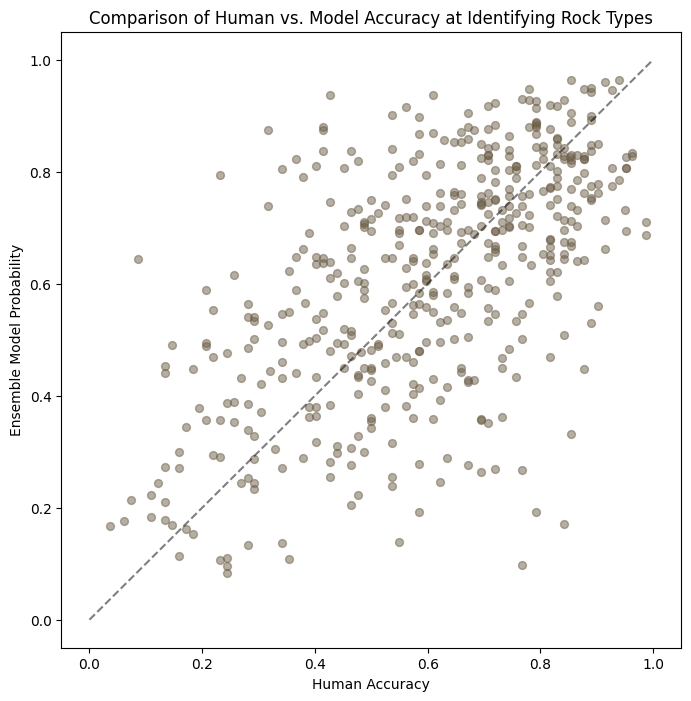

In [49]:
# Plotting human & model accuracy on x- and y-axes, respectively

plt.figure(figsize = (8, 8))
plt.scatter(
    aggregate["Human accuracy"],
    aggregate["Model accuracy"],
    alpha = 0.5,
    s = 32,
    c = "#6C5E47"
)

# Adding a y = x line to better see the division of model vs. human guessing
plt.plot([0, 1], [0, 1], linestyle = "--", color = "black", alpha = 0.5)

plt.xlabel("Human Accuracy")
plt.ylabel("Ensemble Model Probability")
plt.title("Comparison of Human vs. Model Accuracy at Identifying Rock Types")

Correlations come next. This needs to be done for not only the ensemble model, but also the best Softmax, SVM, and Random Forest models. For SVM, we need the additional hyperparameter "probability = True" because it doesn't generate probabilities otherwise.

Below, we can see that our soft-voting ensemble gives us a correlation coefficient of almost exactly 0.6:

In [50]:
# Correlation coefficients

aggregate[["Human accuracy", "Model accuracy"]].corr()

,Human accuracy,Model accuracy
Human accuracy,1.000000,0.599896
Model accuracy,0.599896,1.000000


Now we have to repeat the entire process for each of the three other models at hand:

In [51]:
svm_prob = SVC( # same as best_svm but with probability = True and random seed
    C = 1, degree = 2, gamma = "scale", kernel = "linear",
                probability = True, random_state = 200)

for clf in [best_logreg, svm_prob, best_rf]:
  clf.fit(X_train_scaled, y_train)
  probs = pd.DataFrame(clf.predict_proba(X_scaled)).rename(
    columns = {0: f'{clf.__class__.__name__} probability "Igneous"',
               1: f'{clf.__class__.__name__} probability "Metamorphic"',
               2: f'{clf.__class__.__name__} probability "Sedimentary"'})
  aggregate = pd.concat([aggregate, probs], axis = 1)
  aggregate[f"{clf.__class__.__name__} accuracy"] = 0.0
  for n in range(len(aggregate)):
    if aggregate.loc[n, "Category number"] == 1:
      aggregate.loc[n, f"{clf.__class__.__name__} accuracy"] = aggregate.loc[n, f'{clf.__class__.__name__} probability "Igneous"']
    elif aggregate.loc[n, "Category number"] == 2:
      aggregate.loc[n, f"{clf.__class__.__name__} accuracy"] = aggregate.loc[n, f'{clf.__class__.__name__} probability "Metamorphic"']
    elif aggregate.loc[n, "Category number"] == 3:
      aggregate.loc[n, f"{clf.__class__.__name__} accuracy"] = aggregate.loc[n, f'{clf.__class__.__name__} probability "Sedimentary"']

In [52]:
aggregate[["Rock number", "Human accuracy", "Model accuracy",
           "LogisticRegression accuracy", "SVC accuracy",
           "RandomForestClassifier accuracy"]]

,Rock number,Human accuracy,Model accuracy,LogisticRegression accuracy,SVC accuracy,RandomForestClassifier accuracy
0,1,0.695122,0.789607,0.717034,0.642671,0.745932
1,2,0.719512,0.656505,0.690202,0.755452,0.610785
2,3,0.451220,0.806421,0.828074,0.847495,0.702398
3,4,0.500000,0.341932,0.343779,0.274222,0.439228
4,5,0.512195,0.489316,0.434794,0.426096,0.576294
...,...,...,...,...,...,...
475,476,0.609756,0.869029,0.832742,0.826939,0.754502
476,477,0.524390,0.741185,0.724238,0.761834,0.676180
477,478,0.426829,0.639309,0.577934,0.574433,0.640790
478,479,0.365854,0.647040,0.537309,0.552433,0.637361


In [53]:
aggregate[["Human accuracy", "Model accuracy",
           "LogisticRegression accuracy", "SVC accuracy",
           "RandomForestClassifier accuracy"]].corr()

,Human accuracy,Model accuracy,LogisticRegression accuracy,SVC accuracy,RandomForestClassifier accuracy
Human accuracy,1.000000,0.599896,0.552485,0.528334,0.613672
Model accuracy,0.599896,1.000000,0.940018,0.914557,0.899219
LogisticRegression accuracy,0.552485,0.940018,1.000000,0.957675,0.725346
SVC accuracy,0.528334,0.914557,0.957675,1.000000,0.739394
RandomForestClassifier accuracy,0.613672,0.899219,0.725346,0.739394,1.000000


Correlations with human accuracy:


*   Ensemble: 0.600
*   Softmax: 0.552
*   SVM: 0.528
*   Random Forest: 0.614

Lastly, let's find the p-values of each of these correlation coefficients:

In [54]:
from scipy.stats import pearsonr

for col in ["Model accuracy",
            "LogisticRegression accuracy",
            "SVC accuracy",
            "RandomForestClassifier accuracy",
]:
  print(
      f"{col} correlation p-value: "
      f"{round(pearsonr(aggregate["Human accuracy"], aggregate[col])[1], 10)}"
  )

Model accuracy correlation p-value: 0.0
LogisticRegression accuracy correlation p-value: 0.0
SVC accuracy correlation p-value: 0.0
RandomForestClassifier accuracy correlation p-value: 0.0


All of the p-values are so infinitessimally small that they show up as 0 even when rounding to ten digits. These correlations are significant!